In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import SGDRegressor
import time
import pickle

In [6]:
data=pd.read_csv('insurance.csv')

# Understanding the data

In [7]:
data.shape

(1338, 7)

In [8]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [10]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [11]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [12]:
data.duplicated().sum()

1

In [13]:
data.corr(numeric_only=True)

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


 # Exploratory Data Analysis (EDA)- Univariate Analysis

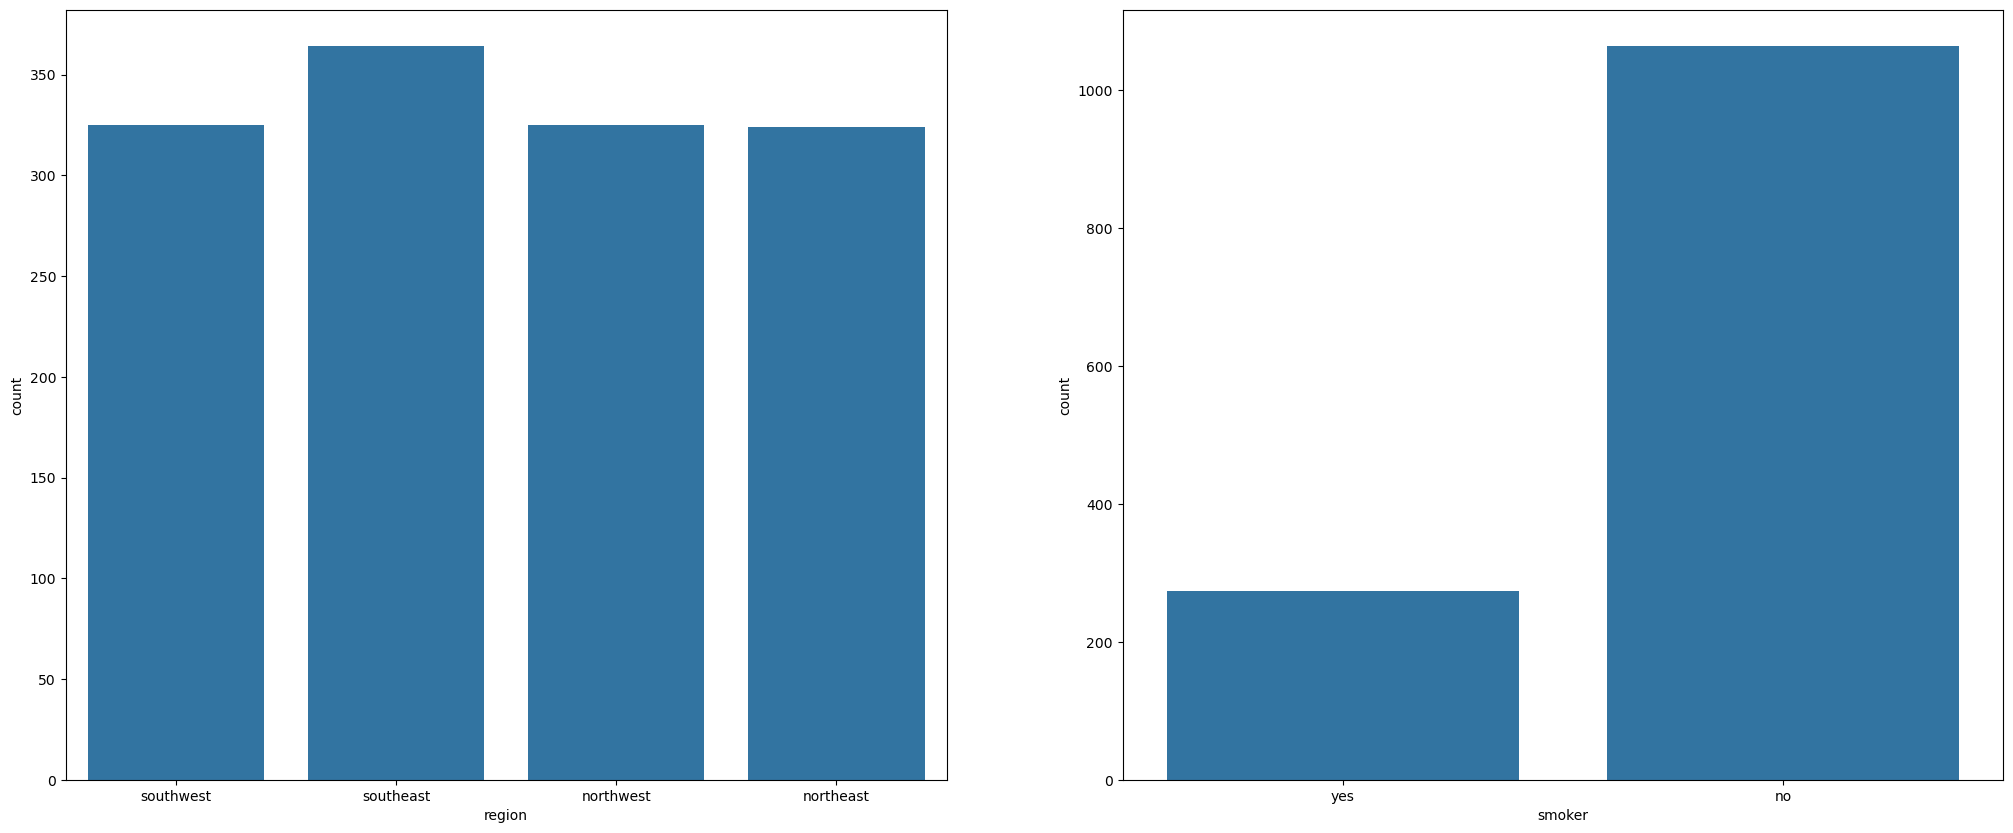

In [14]:
plt.figure(figsize=(25,10))

plt.subplot(1,2,1)
sns.countplot(x='region', data=data)    

plt.subplot(1,2,2)
sns.countplot(x='smoker', data=data) 

plt.show()


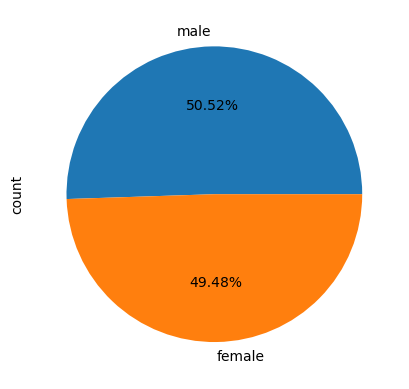

In [15]:
data['sex'].value_counts().plot(kind='pie', autopct='%.2f%%')
plt.show()


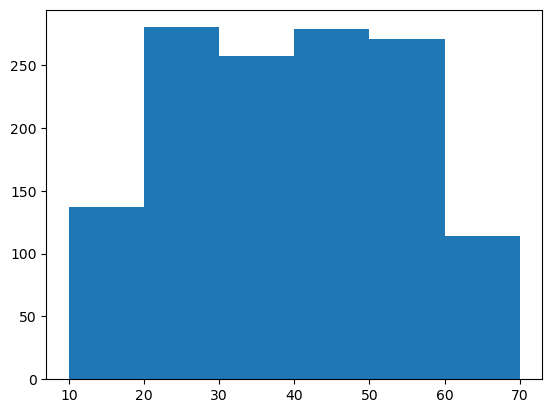

In [16]:
plt.hist(data['age'],bins=[10,20,30,40,50,60,70])
plt.show()

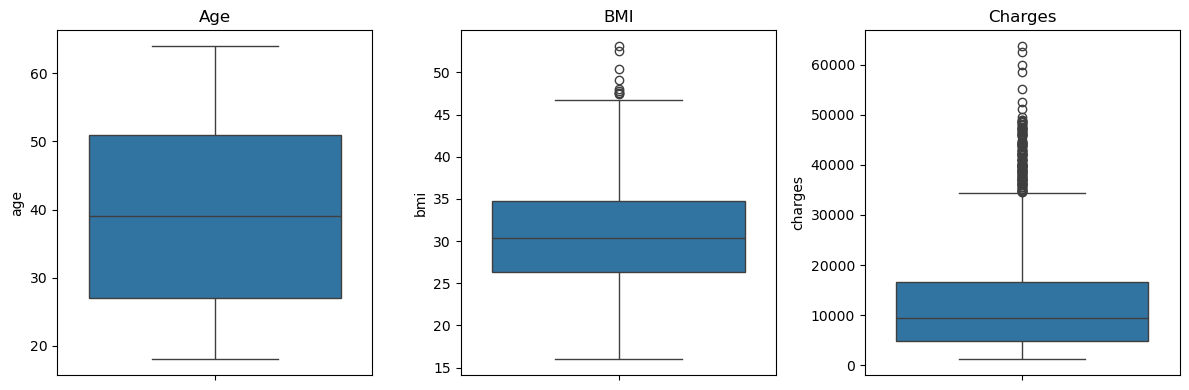

In [17]:
plt.figure(figsize=(12,4))

plt.subplot(1, 3, 1)
sns.boxplot(y=data['age'])
plt.title('Age')

plt.subplot(1, 3, 2)
sns.boxplot(y=data['bmi'])
plt.title('BMI')

plt.subplot(1, 3, 3)
sns.boxplot(y=data['charges'])
plt.title('Charges')

plt.tight_layout()
plt.show()

C:\Users\DELL\AppData\Local\Temp\ipykernel_1660\703496756.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['bmi'])
C:\Users\DELL\AppData\Local\Temp\ipykernel_1660\703496756.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['charges'])


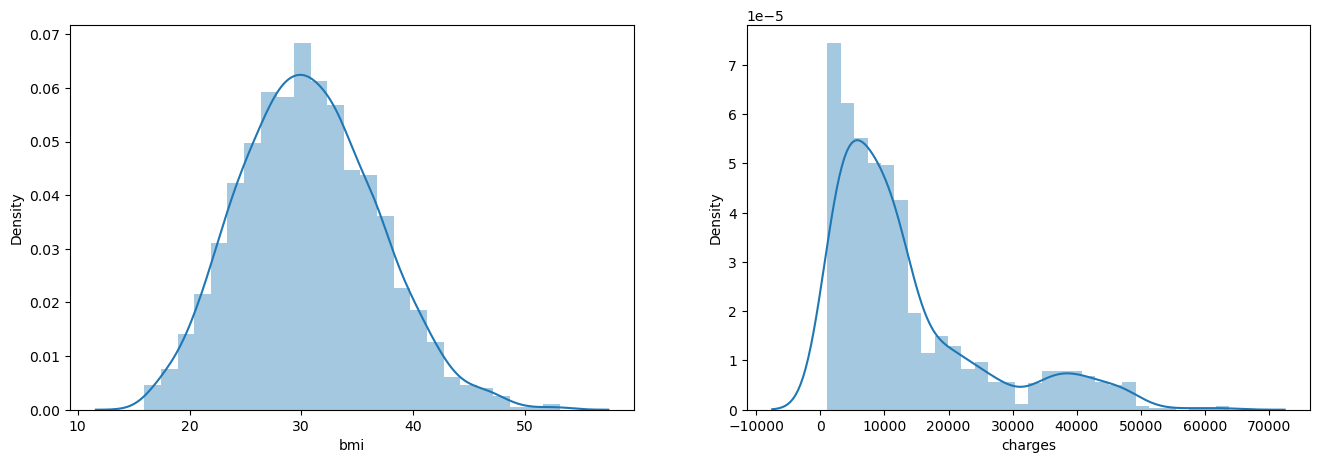

In [18]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(data['bmi'])

plt.subplot(1,2,2)
sns.distplot(data['charges'])

plt.show()

 # Exploratory Data Analysis (EDA)- Bivariate Analysis and Multivariate analysis

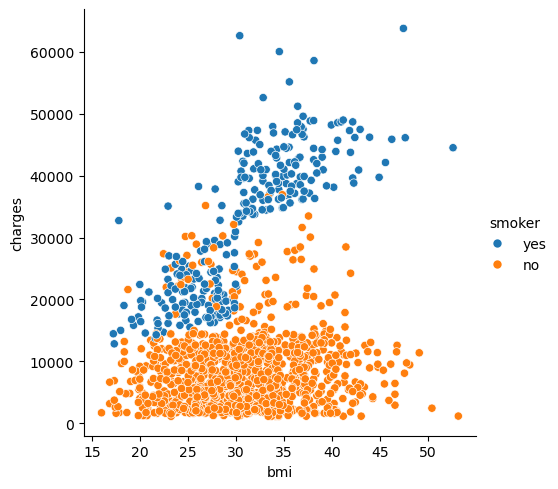

In [19]:
sns.relplot(x=data['bmi'], y=data['charges'],hue=data['smoker'])
plt.show()

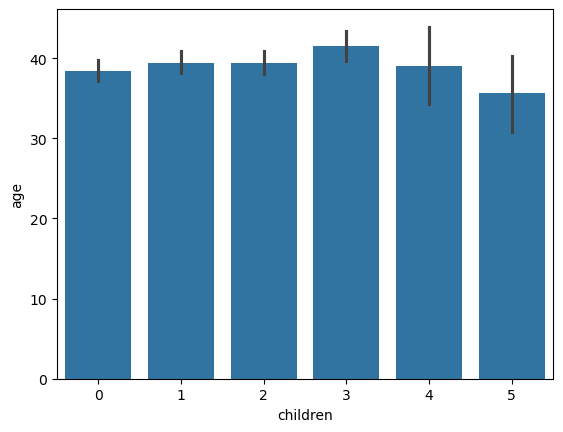

In [20]:
sns.barplot(x='children', y='age', data=data)
plt.show()

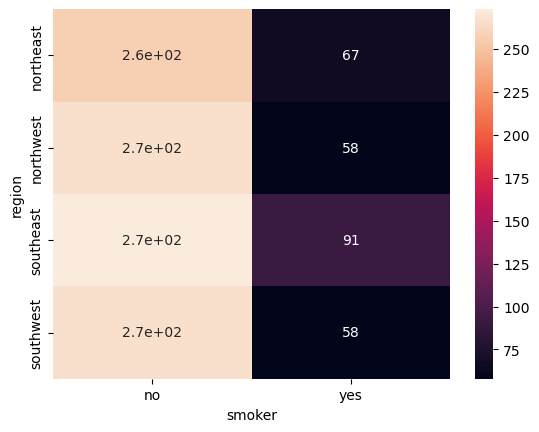

In [21]:
sns.heatmap(pd.crosstab(data['region'], data['smoker']), annot=True)
plt.show()

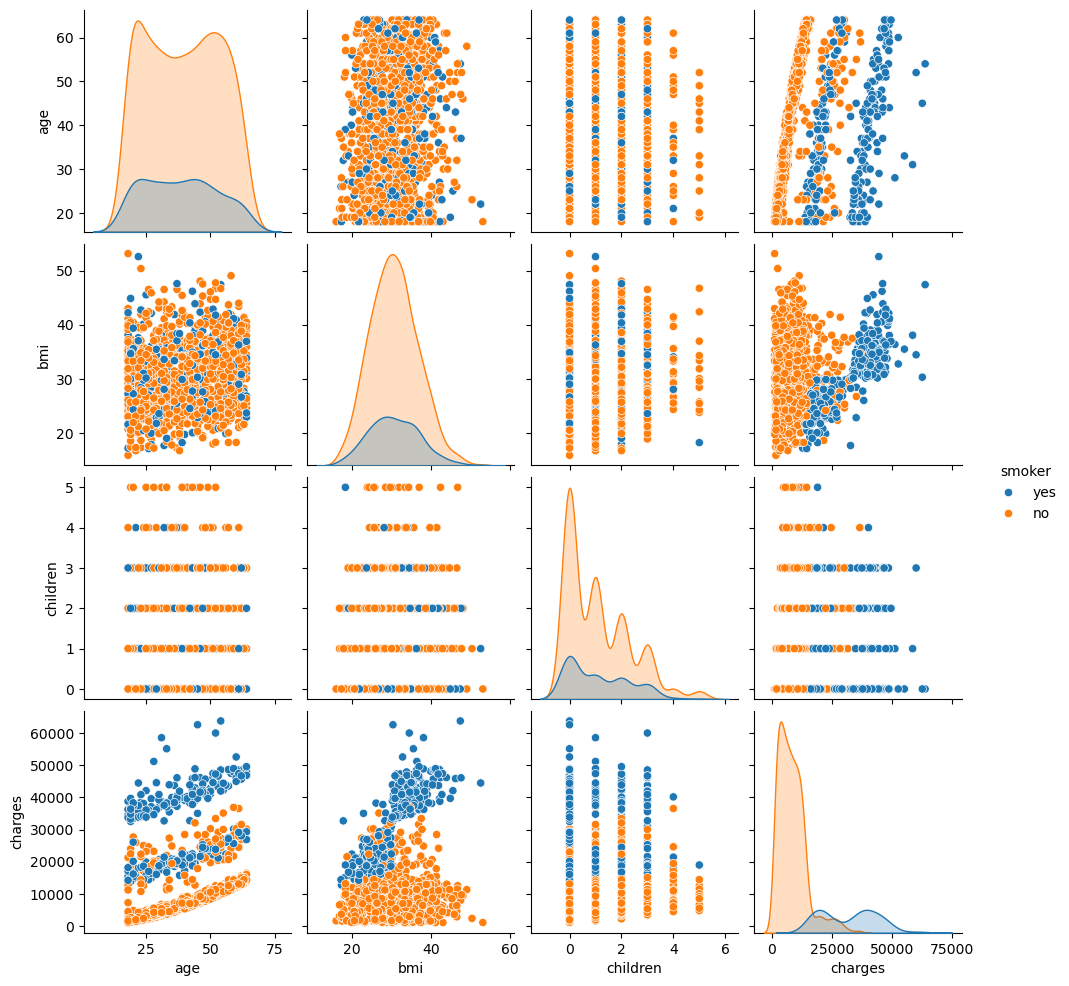

In [22]:
sns.pairplot(data, hue='smoker')
plt.show()

# Data cleaning

In [23]:
data.drop_duplicates(inplace=True)

C:\Users\DELL\AppData\Local\Temp\ipykernel_1660\4235751418.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['bmi'])


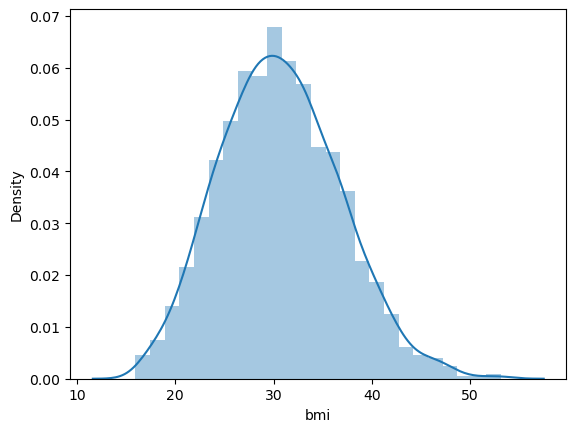

In [24]:
sns.distplot(data['bmi'])

plt.show()

In [25]:
data['bmi'].skew()

0.28391419385321137

In [26]:
# z-score
upper_limit=data['bmi'].mean()+3*data['bmi'].std()
lower_limit=data['bmi'].mean()-3*data['bmi'].std()

# capping
data['bmi']=np.where(
    data['bmi']>upper_limit,
    upper_limit,
    np.where(
        data['bmi']<lower_limit,
        lower_limit,
        data['bmi']
    )
)

# Train_test_Split

In [27]:
x_train,x_test,y_train,y_test=train_test_split(data.drop('charges',axis=1),data['charges'],test_size=0.2)
x_train

,age,sex,bmi,children,smoker,region
277,22,female,24.30,0,no,southwest
106,19,female,28.40,1,no,southwest
1161,34,male,42.13,2,no,southeast
924,43,male,23.20,0,no,southwest
433,60,female,30.50,0,no,southwest
...,...,...,...,...,...,...
940,18,male,23.21,0,no,southeast
591,47,male,19.57,1,no,northwest
274,25,male,27.55,0,no,northwest
216,53,female,26.60,0,no,northwest


# Feature Engineering

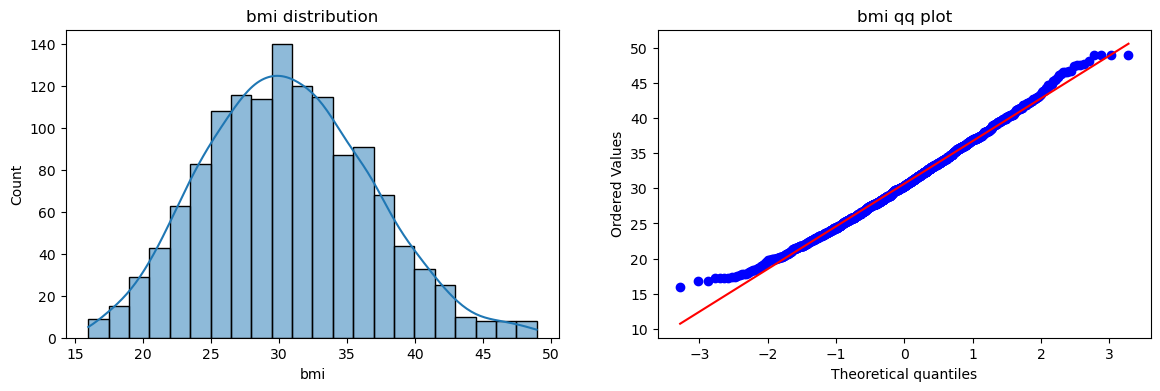

In [28]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.histplot(data['bmi'],kde=True)
plt.title('bmi distribution')
plt.subplot(122)
stats.probplot(data['bmi'], dist="norm", plot=plt)
plt.title('bmi qq plot')
plt.show()

In [29]:
numeric_features = ['age','bmi','children']
categorical_features = ['sex','smoker','region']

In [30]:
preprocess = ColumnTransformer([
    ('log_bmi', FunctionTransformer(np.log1p), ['bmi']),
    ('num', StandardScaler(), numeric_features),
    ('cat', OneHotEncoder(drop='first'), categorical_features)
], remainder='passthrough')

# Pipeline

In [31]:
pipe = Pipeline([
    ('preprocess', preprocess),
    ('model', SGDRegressor( learning_rate='constant',eta0=0.001,max_iter=2500,penalty=None))
])


In [32]:
start=time.time()
pipe.fit(x_train,y_train)
print("time taken is:",time.time()-start)

time taken is: 0.036490678787231445


In [33]:
y_predict=pipe.predict(x_test)

In [34]:
y_predict

array([ 9463.4347144 ,  3537.44903221, 15347.65165177,  8572.48627068,
       35174.96204751, 12763.47307978, 14046.21066347, 16226.5588822 ,
       20786.37807147,  6798.32737072, 12138.2716132 , 36670.83600618,
       16871.09742173,  5104.42800173,  7343.38866849,  6936.80460545,
         955.65812236, 12943.7158102 , 11470.12427642,  4917.67695504,
       39214.90193728,  7505.94767239,  9364.09621429, 18869.74997741,
       35382.72129606,  7891.92506762, 30951.46020773,  6313.54499724,
       15542.83985281, 13405.65204988, 18116.37078426,  5412.50156294,
       38407.09476434,  9076.44003673, 15864.56359802,  7662.28025761,
        5710.09766073,   724.27540517,  4399.68524655, 11513.32397642,
        3057.44558519,  2625.66174588, 15334.81086222,  7311.63223241,
       33767.42935498,  3745.61728675, 11245.03965921, 24003.65590969,
        8182.38121703,  5088.60291422,  6902.89314461, 28654.55393915,
        9148.3667992 ,  5087.18047034, 15417.36308586, 11607.91904846,
      

In [35]:
y_test

864      8782.46900
869      4391.65200
734     14007.22200
535      6067.12675
331     24393.62240
           ...     
470      2497.03830
213      5002.78270
1106     8988.15875
656      3410.32400
397     16586.49771
Name: charges, Length: 268, dtype: float64

In [36]:
print("R² Score:", r2_score(y_test,y_predict))

R² Score: 0.7218211075238721


In [37]:
pickle.dump(pipe,open('pipe.pkl','wb'))